In [117]:
import nltk
import numpy as np
import pandas as pd
import string
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import unicodedata

In [118]:
#veriseti data frame'ye aktarılıyor 

df = pd.read_csv("clean_all_tweets.csv", index_col=[0])

In [119]:
#verisetinin içerisi

df.head()

,Date,User,Tweet,Category,Clean
0,2021-12-31 21:20:00+00:00,trtspor,Mikrofon Elvir Balic'te 🎵🎶\n\nGüzel bir sahne ...,spor,mikrofon elvir balicte güzel bir sahne perform...
1,2021-12-31 20:50:00+00:00,trtspor,Futbolda nadiren yaşanan anlardan birine bu yı...,spor,futbol nadiren yaşamak an bir yıl şahit olmak ...
2,2021-12-31 20:40:00+00:00,trtspor,🔙 Yıl 1992... ❝Spor Stüdyosu❞ programı. \n\n🎙 ...,spor,yıl 1992 spor stüdyo program konuk fenerbahçe ...
3,2021-12-31 20:30:00+00:00,trtspor,📆 2021 yılı sadece olağan spor olaylarına deği...,spor,2021 yıl sadece olağan spor olay değmek pandem...
4,2021-12-31 20:20:00+00:00,trtspor,"😯📸 Spor dünyasında, 2021 yılından akılda kalan...",spor,spor dünya 2021 yıl akıl kalmak kare derlemek


In [120]:
#Belirlenmiş olan kategoriler tanımlanıyor

category = ["spor", "ekonomi", "siyaset", "teknoloji & bilim"]

In [121]:
#Hangi tweetin hangi kategoriye ait olduğu etiketleniyor 0=spor 1=ekonomi 2=siyaset 3=teknoloji & bilim

def etiketle(row):   
    for key,i in enumerate(category):
        if row["Category"] == i:
            return key

In [122]:
#tweet kategorisi spor olanların kategorisine(labels) 0, ekonomi olanların 1, siyaset olanların 2, teknoloji & bilim olanlara 3 değerini giriyor

df["labels"] = df.apply(lambda row:  etiketle(row), axis=1) 

In [123]:
df.head()

,Date,User,Tweet,Category,Clean,labels
0,2021-12-31 21:20:00+00:00,trtspor,Mikrofon Elvir Balic'te 🎵🎶\n\nGüzel bir sahne ...,spor,mikrofon elvir balicte güzel bir sahne perform...,0
1,2021-12-31 20:50:00+00:00,trtspor,Futbolda nadiren yaşanan anlardan birine bu yı...,spor,futbol nadiren yaşamak an bir yıl şahit olmak ...,0
2,2021-12-31 20:40:00+00:00,trtspor,🔙 Yıl 1992... ❝Spor Stüdyosu❞ programı. \n\n🎙 ...,spor,yıl 1992 spor stüdyo program konuk fenerbahçe ...,0
3,2021-12-31 20:30:00+00:00,trtspor,📆 2021 yılı sadece olağan spor olaylarına deği...,spor,2021 yıl sadece olağan spor olay değmek pandem...,0
4,2021-12-31 20:20:00+00:00,trtspor,"😯📸 Spor dünyasında, 2021 yılından akılda kalan...",spor,spor dünya 2021 yıl akıl kalmak kare derlemek,0


In [124]:
X = df.Clean.to_numpy()  #X arrayine temizlenmiş tweetleri koydu (Clean kolonu)
y = df.labels.to_numpy() #Y arrayine kategorileri koydu (labels kolonu)

In [125]:
#tweetlerin arasında istenmeyen karakterler olduğu için utf-8 formatına çeviriliyor

unc_dat=[] #unicode data
for data in X:
    unc_dat.append(unicodedata.normalize('NFKD', str(data)).encode('utf-8', 'ignore'))

In [126]:
X_train, X_test, y_train, y_test = train_test_split(  #x ve y train ve test olarak %80 train - %20 test olacak şekilde parçalanıyor
    unc_dat, y, test_size=0.2, random_state=42)

In [127]:
#Örnek olarak veriler bu şekilde parçalanıyor

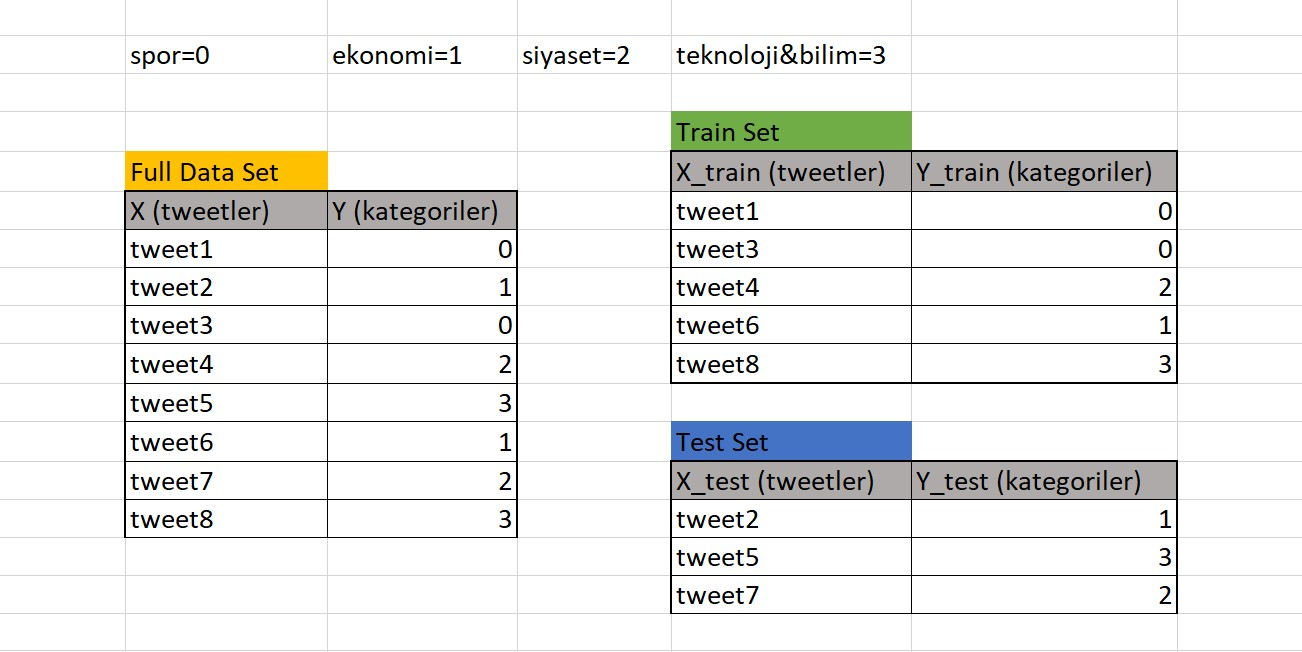


In [128]:
#tweetlerin vektörel matrisi çıkartılıyor. Bu matriste hangi kelimenin, hangi tweette kaç kere geçtiğinin sayısı tutuluyor.

vectorizer = TfidfVectorizer()               #Tf Idf kullanılarak bir kelimenin döküman içindeki önemi istatistiksel olarak hesaplanıyor

Xtrain=X_train
Xtest=X_test

X_train = vectorizer.fit_transform(X_train)  #Modelin verileri işleyebilmesi için veriler vektöre çeviriliyor
X_test = vectorizer.transform(X_test)

In [130]:
#multinomialNB (bayes) modeli train verilerini kullanarak eğitiliyor ve test verileri modele gönderilerek başarısı ölçülüyor

model_NB = MultinomialNB()
model_NB.fit(X_train, y_train)

print("multinomialNB model\n")

print("Train Accuracy:", model_NB.score(X_train, y_train))      #Model train accuracy
predictions_train_nb = model_NB.predict(X_train)                 
print("Train F1 Score:", f1_score(y_train, predictions_train_nb, average='micro'))  #Train F1 score

print("\n")

print("Test Accuracy:", model_NB.score(X_test, y_test))         #Model test accuracy
predictions_test_nb = model_NB.predict(X_test)            
print("Test F1 Score:", f1_score(y_test, predictions_test_nb, average='micro'))     #Test F1 score

multinomialNB model

Train Accuracy: 0.9107983732876712
Train F1 Score: 0.9107983732876712


Test Accuracy: 0.8647260273972602
Test F1 Score: 0.8647260273972602


In [154]:
#SVM modeli train verilerini kullanarak eğitiliyor ve test verileri modele gönderilerek başarısı ölçülüyor

model_SVM=svm.SVC(kernel='linear',random_state=0,probability=True)
model_SVM.fit(X_train, y_train)

print("SVM model\n")

print("SVM train accuracy:", model_SVM.score(X_train, y_train))   #Model train accuracy
predictions_train_svm = model_SVM.predict(X_train)                   
print("SVM Train F1:", f1_score(y_train, predictions_train_svm, average='micro'))     #Train F1 score

print("\n")

print("SVM test accuracy:", model_SVM.score(X_test, y_test))      #Model test accuracy
predictions_test_svm = model_SVM.predict(X_test)                     
print("SVM Test F1:", f1_score(y_test, predictions_test_svm, average='micro'))        #Test F1 score


SVM model

SVM train accuracy: 0.950824058219178
SVM Train F1: 0.950824058219178


SVM test accuracy: 0.8683647260273972
SVM Test F1: 0.8683647260273973


In [150]:
#Kategorilere göre başarı dağılımlarının gösterilmesi

from sklearn.metrics import classification_report

print("NB\n")

print(classification_report(y_test,predictions_test_nb,target_names=category))

print("\n----------------------------------------------------------------\n")
print("SVM\n")

print(classification_report(y_test,predictions_test_svm,target_names=category))


NB

                   precision    recall  f1-score   support

             spor       0.96      0.94      0.95      1173
          ekonomi       0.80      0.82      0.81      1162
          siyaset       0.80      0.85      0.82      1144
teknoloji & bilim       0.90      0.85      0.87      1193

         accuracy                           0.86      4672
        macro avg       0.87      0.86      0.86      4672
     weighted avg       0.87      0.86      0.87      4672


----------------------------------------------------------------

SVM

                   precision    recall  f1-score   support

             spor       0.96      0.95      0.95      1173
          ekonomi       0.79      0.83      0.81      1162
          siyaset       0.85      0.82      0.83      1144
teknoloji & bilim       0.87      0.87      0.87      1193

         accuracy                           0.87      4672
        macro avg       0.87      0.87      0.87      4672
     weighted avg       0.87      

In [133]:
Xtest = [x.decode('UTF8') for x in Xtest] #Xtest arrayinin içindeki tweetler utf-8 formatına dönüştürülüyor

In [151]:
d = {'tweet': Xtest,'category':y_test ,'nb-tahmin': y_pred_NB,'svm-tahmin':y_pred_SVM}
df_tahmin = pd.DataFrame(data=d)

In [152]:
# Modellerin tweetlere göre yaptığı tahminlerin sonuçları

# 0=spor , 1=ekonomi , 2=siyaset , 3=teknoloji & bilim

df_tahmin.head(-5)

,tweet,category,nb-tahmin,svm-tahmin
0,chp genelmek başkan kemal kılıçdaroğlu iyi ...,2,2,2
1,ad tıp kurum demans hastası siyaset aysel tuğ...,2,2,2
2,zafersahin06 iktidar yakınmak gördüğünüzn...,2,2,2
3,abd banka şiddet bir resesyon atlamak mi,1,1,1
4,borsa kapanmak rekor,1,1,1
...,...,...,...,...
4662,deniz seviye 2800 metre üstün dev deniz sür...,3,3,3
4663,kedi yakınmak çevren iyi iç dışarı çıkarma...,3,3,3
4664,3 binmek i̇stanbulkart bloke,1,1,1
4665,hiranur vakıf sancaktepe kaçak yapı özel ima...,2,2,2


In [166]:
#Modelin hata oranları

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


nb_mse=mean_squared_error(y_test,predictions_test_nb) #nb modelinin ortalama kare hatası
print("nb modelinin ortalama kare hatası:",nb_mse)

nb_mae=mean_absolute_error(y_test,predictions_test_nb) #nb modelinin ortalama mutlak hatası
print("nb modelinin ortalama mutlak hatası:",nb_mae)

print("\n")

svm_mse=mean_squared_error(y_test,predictions_test_svm) #svm modelinin ortalama kare hatası
print("svm modelinin ortalama kare hatası:",svm_mse)

svm_mae=mean_absolute_error(y_test,predictions_test_svm) #svm modelinin ortalama mutlak hatası
print("svm modelinin ortalama mutlak hatası:",svm_mae)

nb modelinin ortalama kare hatası: 0.3272688356164384
nb modelinin ortalama mutlak hatası: 0.19584760273972604


svm modelinin ortalama kare hatası: 0.3450342465753425
svm modelinin ortalama mutlak hatası: 0.19777397260273974


In [136]:
!pip install zeyrek
import zeyrek

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [137]:
#Model lemmatize işlemi yapılmış verilerden oluştuğundan modele manuel tweet gönderirken tekrardan lemmatize işlemi yapmak gerekli

from IPython.display import clear_output 
nltk.download('punkt')     #Lemmatize işlemi için kütüphaneden indiriliyor.

def lemm_tweet(tweet):  
    analyzer = zeyrek.MorphAnalyzer()
    lemm_tweet = analyzer.lemmatize(tweet)    #tweetler için lemmatize işlemi gerçekleştiriliyor
    lemm_tweet=[el[1][-1] for el in lemm_tweet]
    clear_tweet =' '.join(lemm_tweet)         #dizi string hale getiriliyor
    clear_tweet = clear_tweet.lower()         #metin küçük harflere çevriliyor
    clear_output(wait=True)                   #konsol temizleniyor
    return clear_tweet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [167]:
#Manuel tweet testi

tweet = "2023 asgari ücreti açıklandı. 2023 de asgari ücret 8500 tl olacak"


lemm_data=lemm_tweet(tweet) #girilen metni lemmatize işlemine sokarak her kelimesinin kökünü aldırıyoruz

print("TWEET:",tweet)                          #girilen tweet
print("LEMM TWEET:",lemm_data,"\n")            #lemmatize edilmiş tweet

tweet_vec = vectorizer.transform([lemm_data])  #Metni modele göndermek için metnin vektörünü alıyoruz

category_sonuc_svm=model_SVM.predict(tweet_vec)   #SVM modeline girdiğimiz tweeti gönderiyoruz
category_sonuc_nb=model_NB.predict(tweet_vec)     #MultinomialNB modeline girdiğimiz tweeti gönderiyoruz

print("NB Model Proba :", model_NB.predict_proba(tweet_vec))   #Modelin tahmin ettiği olasılıklar
print("SVM Model Proba:", model_SVM.predict_proba(tweet_vec))    #svm modelinin predict'i proba ya göre daha fazla çaprazlama yaptığı için bazen predict ile proba arasında farklılık oluşabiliyor. 

print("\nNB modelinin tahmini: ", category[category_sonuc_nb[0]])      #modelin girilen tweet tahmini
print("SVM modelinin tahmini:", category[category_sonuc_svm[0]])      #modelin girilen tweet tahmini


TWEET: 2023 asgari ücreti açıklandı. 2023 de asgari ücret 8500 tl olacak
LEMM TWEET: 2023 asgari ücret açıklamak . 2023 de asgari ücret 8500 tl olmak 

NB Model Proba : [[0.02745809 0.63954342 0.27333564 0.05966284]]
SVM Model Proba: [[0.00427511 0.64165519 0.3397377  0.014332  ]]

NB modelinin tahmini:  ekonomi
SVM modelinin tahmini: ekonomi
